In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#sns.set(font="Times New Roman")

pd.set_option("display.max_columns", 144)

# 1: Synopsis

This exploratory data analysis focus on the dataset from FVCOM simulations, in this dataset, two scnarios are included, Meiji and present.


# 2: Make dataset from simulation results

There are several groups of water age related indicators:

* Upstream water age, wa_u
* Downstream water age, wa_d
* Renewing water age, wa_r
* Ratio of wa_u to wa_d



## 2.1 Annual water age

In [2]:
wa_a = {'Lat.': [], 'Lon.': [], 'Layer': [], 
        'Scenario': [], 'Time': [],
        'WA_U': [], 'WA_D': [], 'WA_R': [],
        'RUD': []}

for wa_path in ['wa']:
    for wa_scen in ['meiji','present']:
        for wa_time in [var for var in range(1)]:
            for wa_slay in [var for var in range(1,21)]:
                filepath_u = '../{0}_files/{1}_cu_m{2:02d}_{3:02d}_inner.csv'. format(wa_path,wa_scen,wa_time,wa_slay)
                df_u = pd.read_csv(filepath_u,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                filepath_d = '../{0}_files/{1}_cd_m{2:02d}_{3:02d}_inner.csv'.format(wa_path,wa_scen,wa_time,wa_slay)
                df_d = pd.read_csv(filepath_d,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                filepath_ud = '../{0}_files/{1}_cud_m{2:02d}_{3:02d}_inner.csv'.format(wa_path,wa_scen,wa_time,wa_slay)
                df_ud = pd.read_csv(filepath_ud,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                filepath_r = '../{0}_files/{1}_cr_m{2:02d}_{3:02d}_inner.csv'.format(wa_path,wa_scen,wa_time,wa_slay)
                df_r = pd.read_csv(filepath_r,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                wa_a['Lat.']     += df_u['lat'].values.tolist()
                wa_a['Lon.']     += df_u['lon'].values.tolist()
                wa_a['Layer']    += [wa_slay] * df_u.shape[0]
                wa_a['Scenario'] += [wa_scen] * df_u.shape[0]
                wa_a['Time']     += [wa_time] * df_u.shape[0]
                df_u['WA_U']     = pd.to_numeric(df_u['value'],errors='coerce')
                wa_a['WA_U']     += df_u['WA_U'].values.tolist()
                df_d['WA_D']     = pd.to_numeric(df_d['value'],errors='coerce')
                wa_a['WA_D']     += df_d['WA_D'].values.tolist()
                df_r['WA_R']     = pd.to_numeric(df_r['value'],errors='coerce')
                wa_a['WA_R']     += df_r['WA_R'].values.tolist()
                df_ud['RUD']     = pd.to_numeric(df_ud['value'],errors='coerce')
                wa_a['RUD']      += df_ud['RUD'].values.tolist()
                
wa_a = pd.DataFrame.from_dict(wa_a)
wa_a.head()

,Lat.,Lon.,Layer,Scenario,Time,WA_U,WA_D,WA_R,RUD
0,35.259910,139.707568,1,meiji,0,28.45,61.30,32.91,0.46
1,35.259910,139.712072,1,meiji,0,28.45,60.83,32.73,0.47
2,35.259910,139.743604,1,meiji,0,30.16,54.57,30.59,0.55
3,35.259910,139.748108,1,meiji,0,30.07,45.08,26.37,0.67
4,35.264414,139.689550,1,meiji,0,28.23,64.84,34.33,0.43


In [4]:
data = wa_a.copy()
data.shape

(213520, 9)

In [5]:
data.describe()

,Lat.,Lon.,Layer,Time,WA_U,WA_D,WA_R,RUD
count,213520.000000,213520.000000,213520.000000,213520.0,213520.000000,213520.000000,213520.000000,213520.000000
mean,35.489607,139.852237,10.500000,0.0,41.384648,72.732816,50.716619,0.681321
std,0.104479,0.116908,5.766295,0.0,14.210106,618.467237,18.301075,1.423051
min,35.259910,139.617477,1.000000,0.0,-377.460000,-30714.900000,-135.140000,-58.590000
25%,35.404054,139.761622,5.750000,0.0,32.460000,54.070000,35.410000,0.480000
50%,35.494144,139.842703,10.500000,0.0,41.680000,68.600000,51.540000,0.580000
75%,35.575225,139.946306,15.250000,0.0,49.910000,81.480000,63.650000,0.840000
max,35.696847,140.126486,20.000000,0.0,314.040000,49262.050000,114.790000,431.070000


In [6]:
data.drop(data[data['WA_U'] < 0].index, inplace = True)
data.drop(data[data['WA_U'] > 125].index, inplace = True)
data.drop(data[data['WA_D'] < 0].index, inplace = True)
data.drop(data[data['WA_D'] > 125].index, inplace = True)
data.drop(data[data['WA_R'] < 0].index, inplace = True)
data.drop(data[data['WA_R'] > 125].index, inplace = True)
data.drop(data[data['RUD'] < 0].index, inplace = True)

In [7]:
data.describe()

,Lat.,Lon.,Layer,Time,WA_U,WA_D,WA_R,RUD
count,210865.000000,210865.000000,210865.000000,210865.0,210865.000000,210865.000000,210865.000000,210865.000000
mean,35.488606,139.853251,10.505489,0.0,41.670732,66.477614,50.900923,0.691518
std,0.104402,0.117151,5.764755,0.0,13.778066,17.842496,18.054242,1.023879
min,35.259910,139.617477,1.000000,0.0,0.320000,0.430000,0.670000,0.000000
25%,35.404054,139.761622,6.000000,0.0,32.710000,54.580000,35.450000,0.490000
50%,35.494144,139.847207,11.000000,0.0,41.930000,68.760000,51.650000,0.580000
75%,35.575225,139.946306,16.000000,0.0,50.010000,81.530000,63.850000,0.840000
max,35.696847,140.126486,20.000000,0.0,121.350000,124.390000,114.790000,431.070000


In [8]:
data.isnull().sum()

Lat.        0
Lon.        0
Layer       0
Scenario    0
Time        0
WA_U        0
WA_D        0
WA_R        0
RUD         0
dtype: int64

In [9]:
data['Layer'].value_counts()

17    10558
14    10557
20    10556
12    10554
15    10553
13    10553
16    10552
18    10550
10    10548
9     10547
8     10545
11    10544
7     10543
6     10541
19    10539
4     10534
5     10533
3     10529
2     10520
1     10509
Name: Layer, dtype: int64

In [10]:
data['Scenario'].value_counts()

meiji      118660
present     92205
Name: Scenario, dtype: int64

In [11]:
data.to_csv('wa_a.csv',index=False)

## 2.2 Seasonal water age

In [22]:
wa_s = {'Lat.': [], 'Lon.': [], 'Layer': [], 
        'Scenario': [], 'Time': [],
        'WA_U': [], 'WA_D': [], 'WA_R': [],
        'RUD': []}

for wa_path in ['wa']:
    for wa_scen in ['meiji','present']:
        for wa_time in ['spr','sum','aut','win']:
            for wa_slay in [var for var in range(1,21)]:
                filepath_u = '../{0}_files/{1}_cu_{2}_{3:02d}_inner.csv'. format(wa_path,wa_scen,wa_time,wa_slay)
                df_u = pd.read_csv(filepath_u,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                filepath_d = '../{0}_files/{1}_cd_{2}_{3:02d}_inner.csv'.format(wa_path,wa_scen,wa_time,wa_slay)
                df_d = pd.read_csv(filepath_d,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                filepath_ud = '../{0}_files/{1}_cud_{2}_{3:02d}_inner.csv'.format(wa_path,wa_scen,wa_time,wa_slay)
                df_ud = pd.read_csv(filepath_ud,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                filepath_r = '../{0}_files/{1}_cr_{2}_{3:02d}_inner.csv'.format(wa_path,wa_scen,wa_time,wa_slay)
                df_r = pd.read_csv(filepath_r,names=['lon','lat','value'],
                                   header=None,index_col=False,
                                   na_values='Inf')
                wa_s['Lat.']     += df_u['lat'].values.tolist()
                wa_s['Lon.']     += df_u['lon'].values.tolist()
                wa_s['Layer']    += [wa_slay] * df_u.shape[0]
                wa_s['Scenario'] += [wa_scen] * df_u.shape[0]
                wa_s['Time']     += [wa_time] * df_u.shape[0]
                df_u['WA_U']     = pd.to_numeric(df_u['value'],errors='coerce')
                wa_s['WA_U']     += df_u['WA_U'].values.tolist()
                df_d['WA_D']     = pd.to_numeric(df_d['value'],errors='coerce')
                wa_s['WA_D']     += df_d['WA_D'].values.tolist()
                df_r['WA_R']     = pd.to_numeric(df_r['value'],errors='coerce')
                wa_s['WA_R']     += df_r['WA_R'].values.tolist()
                df_ud['RUD']     = pd.to_numeric(df_ud['value'],errors='coerce')
                wa_s['RUD']      += df_ud['RUD'].values.tolist()
                
wa_s = pd.DataFrame.from_dict(wa_s)
wa_s.head()

,Lat.,Lon.,Layer,Scenario,Time,WA_U,WA_D,WA_R,RUD
0,35.259910,139.707568,1,meiji,spr,27.62,61.32,32.58,0.45
1,35.259910,139.712072,1,meiji,spr,27.67,60.81,32.40,0.45
2,35.259910,139.743604,1,meiji,spr,29.51,54.79,30.48,0.54
3,35.259910,139.748108,1,meiji,spr,29.53,45.58,26.42,0.65
4,35.264414,139.689550,1,meiji,spr,27.11,64.90,33.95,0.42


In [78]:
data_s = wa_s.copy()
data_s.shape

(854080, 9)

In [79]:
data_s.describe()

,Lat.,Lon.,Layer,WA_U,WA_D,WA_R,RUD
count,854080.000000,854080.000000,854080.000000,854080.000000,854080.000000,854080.000000,854080.000000
mean,35.489607,139.852237,10.500000,41.384662,72.732818,50.716599,0.681336
std,0.104479,0.116908,5.766285,14.549507,723.396102,18.539592,2.777224
min,35.259910,139.617477,1.000000,-457.030000,-51048.320000,-135.980000,-232.450000
25%,35.404054,139.761622,5.750000,32.120000,53.750000,35.310000,0.480000
50%,35.494144,139.842703,10.500000,41.290000,68.560000,50.970000,0.580000
75%,35.575225,139.946306,15.250000,50.670000,80.750000,64.840000,0.840000
max,35.696847,140.126486,20.000000,381.150000,107713.280000,137.610000,1724.730000


In [80]:
data_s.drop(data_s[data_s['WA_U'] < 0].index, inplace = True)
data_s.drop(data_s[data_s['WA_U'] > 125].index, inplace = True)
data_s.drop(data_s[data_s['WA_D'] < 0].index, inplace = True)
data_s.drop(data_s[data_s['WA_D'] > 125].index, inplace = True)
data_s.drop(data_s[data_s['WA_R'] < 0].index, inplace = True)
data_s.drop(data_s[data_s['WA_R'] > 125].index, inplace = True)
data_s.drop(data_s[data_s['RUD'] < 0].index, inplace = True)

In [81]:
data_s.describe()

,Lat.,Lon.,Layer,WA_U,WA_D,WA_R,RUD
count,843630.000000,843630.000000,843630.000000,843630.000000,843630.000000,843630.000000,843630.000000
mean,35.488612,139.853226,10.505150,41.665042,66.469101,50.900426,0.694499
std,0.104393,0.117147,5.764668,14.110766,18.281803,18.291935,2.685698
min,35.259910,139.617477,1.000000,0.230000,0.040000,0.410000,0.000000
25%,35.404054,139.761622,6.000000,32.370000,54.210000,35.350000,0.490000
50%,35.494144,139.847207,11.000000,41.470000,68.700000,51.100000,0.580000
75%,35.575225,139.946306,16.000000,50.790000,80.800000,64.970000,0.840000
max,35.696847,140.126486,20.000000,123.460000,124.940000,124.340000,1724.730000


In [82]:
data_s.isnull().sum()

Lat.        0
Lon.        0
Layer       0
Scenario    0
Time        0
WA_U        0
WA_D        0
WA_R        0
RUD         0
dtype: int64

In [83]:
data_s['Layer'].value_counts()

14    42236
17    42230
13    42227
15    42225
16    42224
12    42220
20    42209
18    42204
10    42199
11    42198
9     42187
8     42187
7     42184
19    42173
6     42168
5     42151
4     42141
3     42122
2     42084
1     42061
Name: Layer, dtype: int64

In [84]:
data_s['Scenario'].value_counts()

meiji      474636
present    368994
Name: Scenario, dtype: int64

In [85]:
data_s.to_csv('wa_s.csv',index=False)

# 3: EDA of annual water age
## 3.1 Heatmap of variables coorelation

In [12]:
df = data.copy()

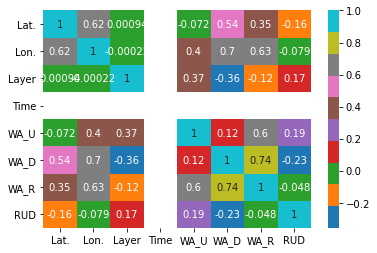

In [13]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='tab10', annot=True);

## 3.2 Histogram of water age

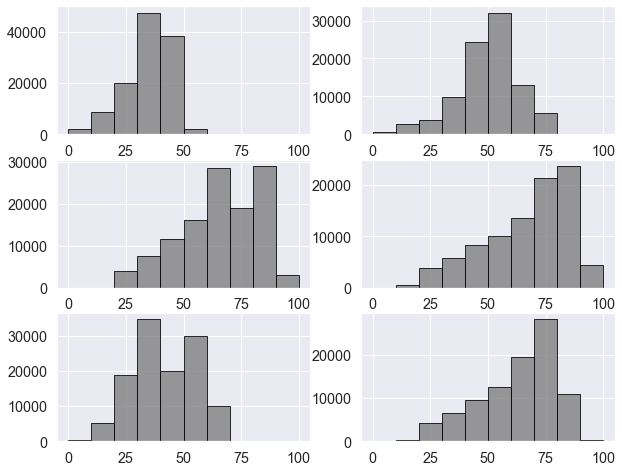

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 1].hist(df[df['Scenario']=='present']['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 1].hist(df[df['Scenario']=='present']['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 1].hist(df[df['Scenario']=='present']['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[0, 0].hist(df[df['Scenario']=='meiji']['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 0].hist(df[df['Scenario']=='meiji']['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 0].hist(df[df['Scenario']=='meiji']['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
plt.show()

Line 1,2,and 3 are upstream, downstream, and renewing water age.
Left panel are present, right are meiji.

* present, river age: [0,80], 50-60 are the most
* present, ocean age: [10,100], 80-90 are the most
* present, renew age: [10,100], 70-80 are the most
* meiji, river age: [0,60], 30-40 are the most
* meiji, ocean age: [20,100], 60-70, and 80-90 are the most, uneven distribute
* meiji, renew age: [0-70], 30-40 are the most

from meiji to the present, river age get older; ocean age seems not change much but distribution changed; renew age change both, renew age get aged, also, distribution get even.

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

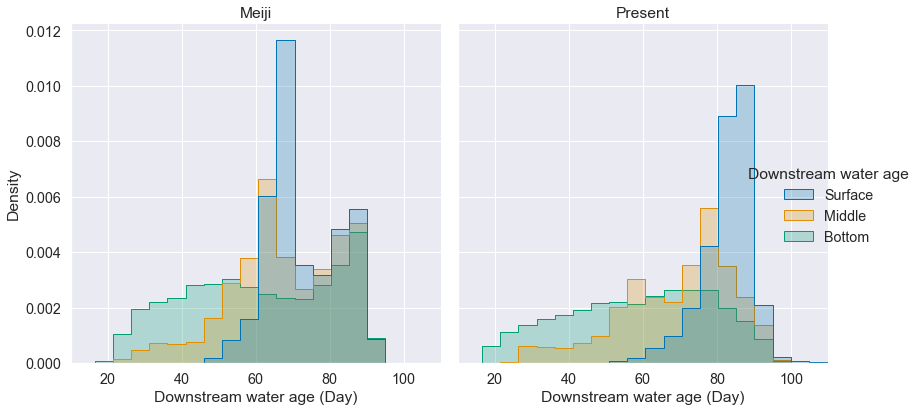

In [16]:
col_wrap=2
legend_title='Downstream water age'
legend_lables=['Surface', 'Middle', 'Bottom']
savename="hist_type.png"
dft = df.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[(dft.Layer == 1) | (dft.Layer == 8) | (dft.Layer == 16)], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_D", kind="hist", hue="Layer", stat="density",
                bins = 25,element="step",fill=True,
                palette="colorblind", height=6, aspect=1,
                facet_kws={'legend_out': True})
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(10, 110)
g.set_axis_labels("Downstream water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

Summary on downstream water age:

* Range do not change much, from about 20 to 90
* Most density age changed, surface: from 70 to 90; middle: from 60 to 80, and bottom: from bimodal to uniform.
* Surface and middle age get older

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

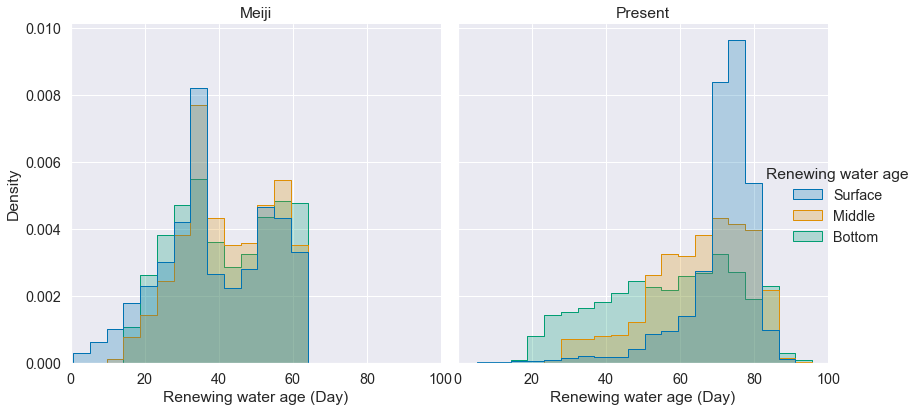

In [17]:
col_wrap=2
legend_title='Renewing water age'
legend_lables=['Surface', 'Middle', 'Bottom']
savename="hist_type.png"
dft = df.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[(dft.Layer == 1) | (dft.Layer == 8) | (dft.Layer == 16)], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_R", kind="hist", hue="Layer", stat="density",
                bins = 25,element="step",fill=True,
                palette="colorblind", height=6, aspect=1,
                facet_kws={'legend_out': True})
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 100)
g.set_axis_labels("Renewing water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

Summary on renewing water age:

* In meiji, bimodal distribution is found, actually, this is due to mutual influence of upstream and downstream water, 30 is upstream, and 60 is downstream.
* In present, single-modal distribution is found. Downstream is more predominant.

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

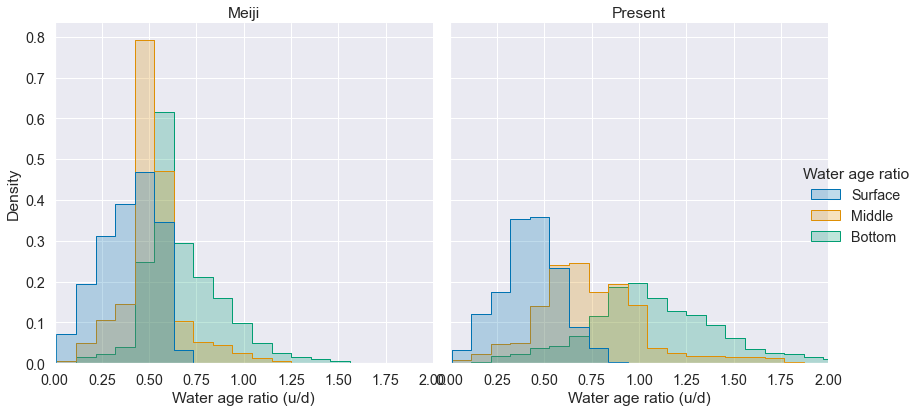

In [28]:
col_wrap=2
legend_title='Water age ratio'
legend_lables=['Surface', 'Middle', 'Bottom']
savename="hist_type.png"
dft = df.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[(dft.Layer == 1) | (dft.Layer == 8) | (dft.Layer == 16)], 
                col="Scenario",col_wrap=col_wrap,
                x="RUD", kind="hist", hue="Layer",fill=True,
                palette="colorblind", height=6, aspect=1,
                stat="density",bins = 250,element="step",
                facet_kws={'legend_out': True})
#g = sns.displot(data=dft[(dft.Layer == 1) | (dft.Layer == 8) | (dft.Layer == 16)], 
#                col="Scenario",col_wrap=col_wrap,
#                x="RUD", kind="kde", hue="Layer",fill=True,
#                palette="colorblind", height=6, aspect=1)
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 2)
g.set_axis_labels("Water age ratio (u/d)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

Summary on renewing water age ratio (u/d):

* In meiji, all layers of water around 0.5.
* In present, surface ratio decreased, middle and bottom ratio increased.
* u/d increase means what? u increase or d decrease, river age increase or ocean age decrease, river water renew get difficult, and ocean renew get easier.
* So, the results mean surface river water renew easier, and bottom ocean water renew easier.

## 3.3 Jointplot of water age

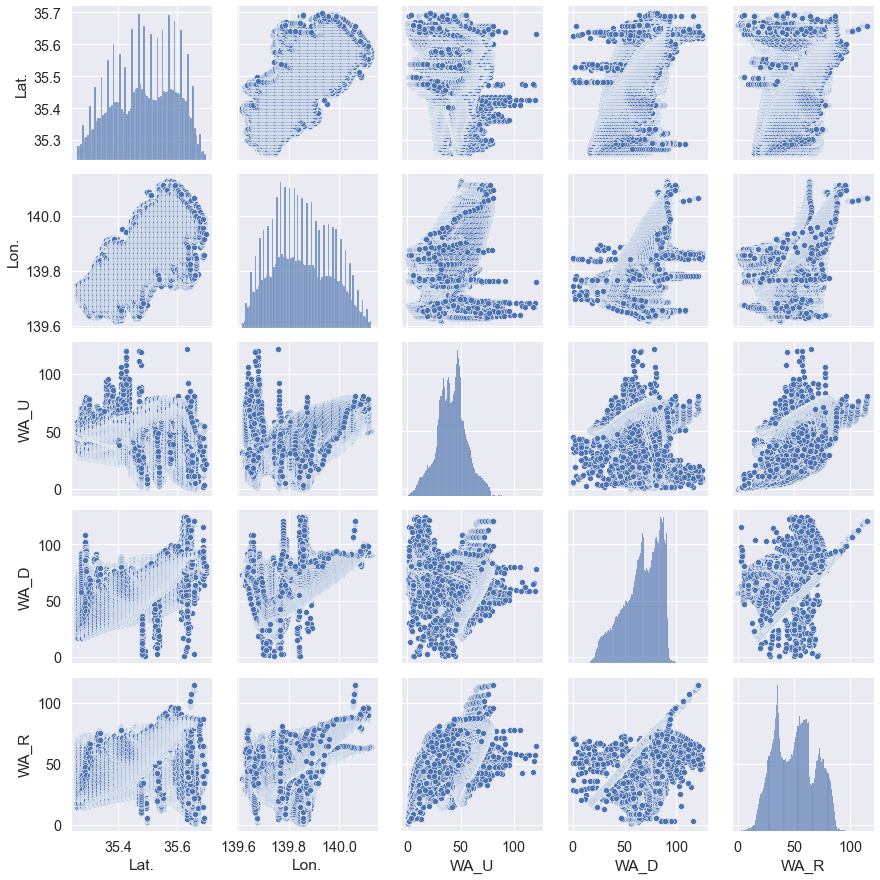

In [42]:
sns.pairplot(df[['Lat.','Lon.','Scenario','WA_U','WA_D','WA_R']])

### 3.3.1 Upstream water age

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

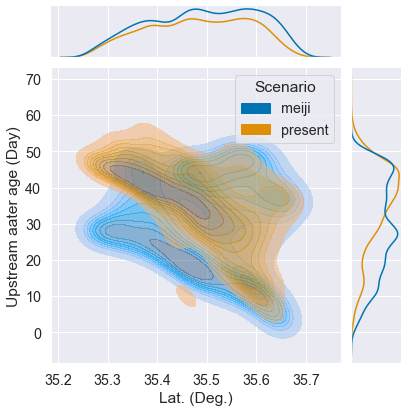

In [46]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lat.", y="WA_U",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Upstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

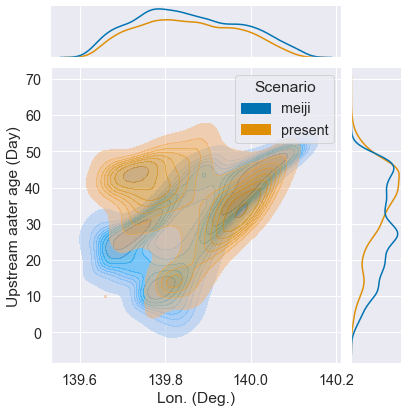

In [47]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lon.", y="WA_U",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Upstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

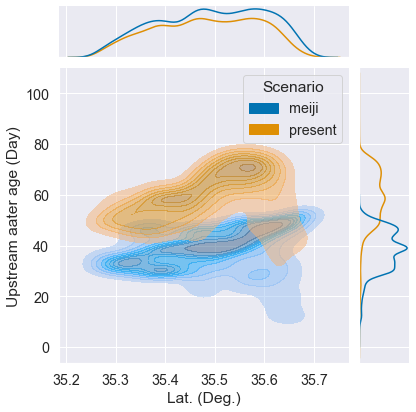

In [44]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lat.", y="WA_U",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Upstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

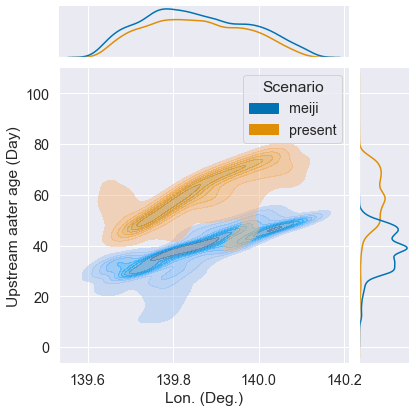

In [45]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lon.", y="WA_U",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Upstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

### 3.3.2 Downstream water age

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

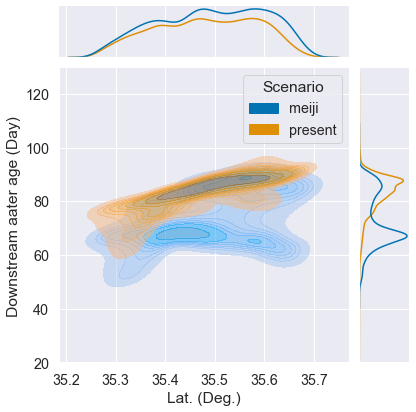

In [48]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lat.", y="WA_D",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Downstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

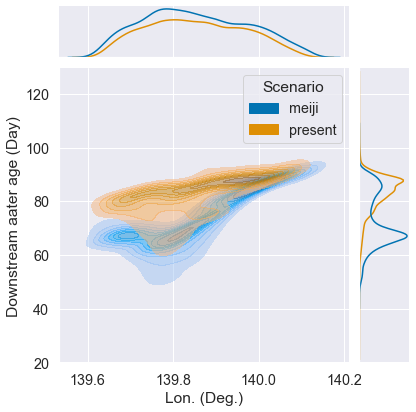

In [50]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lon.", y="WA_D",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Downstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

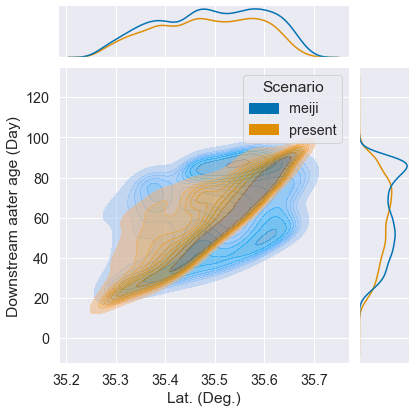

In [51]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lat.", y="WA_D",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Downstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

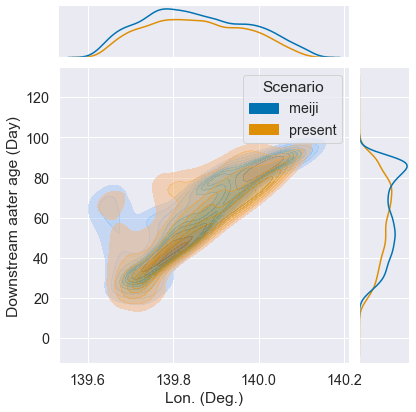

In [52]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lon.", y="WA_D",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Downstream aater age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

### 3.3.3 Renewing water age

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

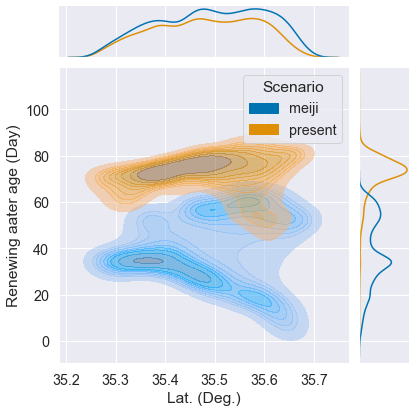

In [53]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lat.", y="WA_R",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Renewing water age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

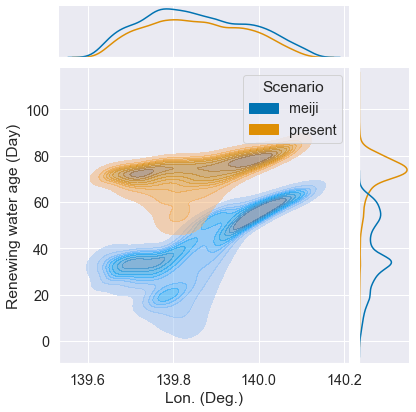

In [55]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lon.", y="WA_R",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Renewing water age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

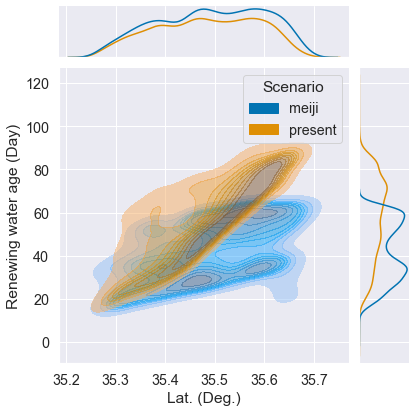

In [56]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lat.", y="WA_R",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Renewing water age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

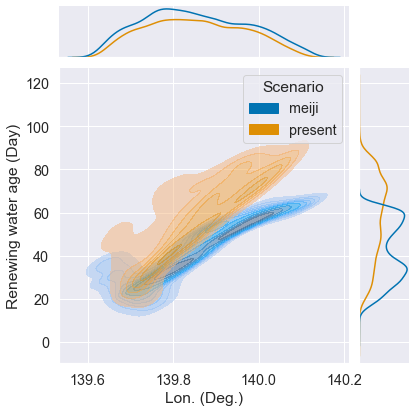

In [57]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lon.", y="WA_R",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Renewing water age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

### 3.3.4 Water age ratio

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

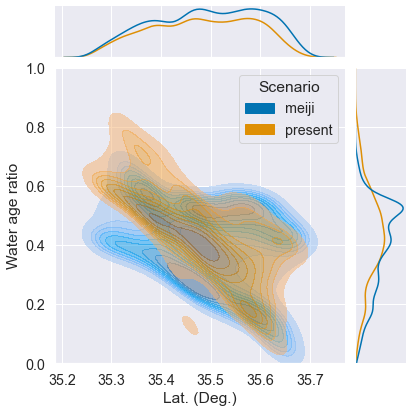

In [76]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lat.", y="RUD",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  ylim = (0,1.0),
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Water age ratio")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

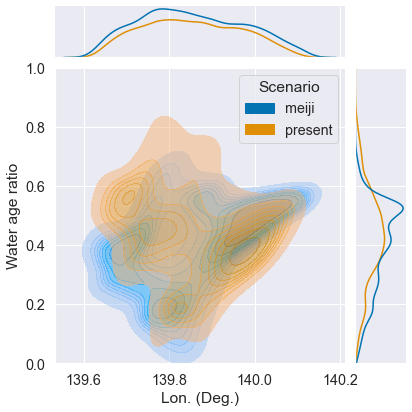

In [77]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 1], 
                  x="Lon.", y="RUD",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  ylim = (0,1.0),
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Water age ratio")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

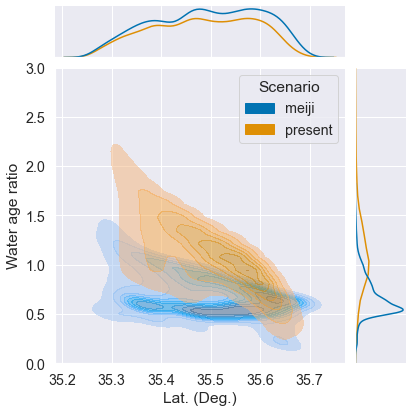

In [63]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lat.", y="RUD",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  ylim = (0,3),
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Water age ratio")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

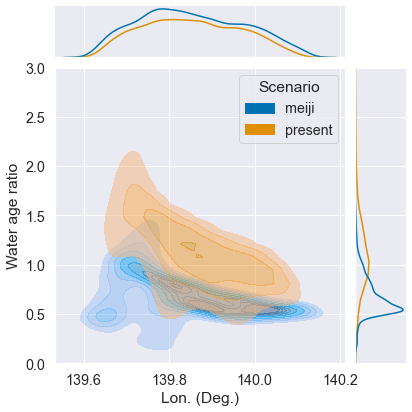

In [64]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=df[df.Layer == 16], 
                  x="Lon.", y="RUD",
                  kind="kde",
                  hue="Scenario",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  ylim = (0,3),
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lon. (Deg.)","Water age ratio")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

# 4. EDA of seasonal water age
## 4.1 Heatmap of variables coorelation

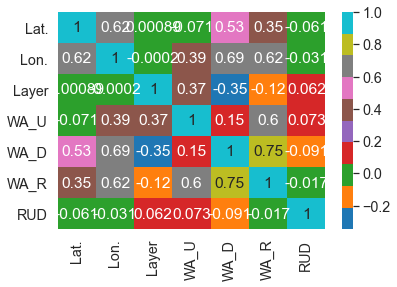

In [87]:
dfs = data_s.copy()
corr = dfs.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='tab10', annot=True);

In [88]:
## 4.2 Histogram of water age

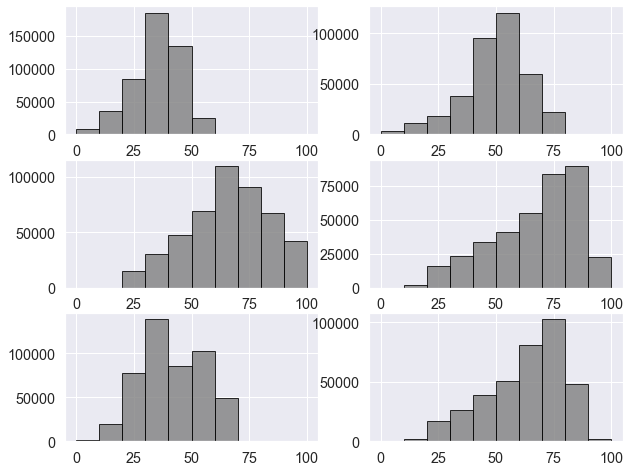

In [89]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 1].hist(dfs[dfs['Scenario']=='present']['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 1].hist(dfs[dfs['Scenario']=='present']['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 1].hist(dfs[dfs['Scenario']=='present']['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[0, 0].hist(dfs[dfs['Scenario']=='meiji']['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 0].hist(dfs[dfs['Scenario']=='meiji']['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 0].hist(dfs[dfs['Scenario']=='meiji']['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
plt.show()

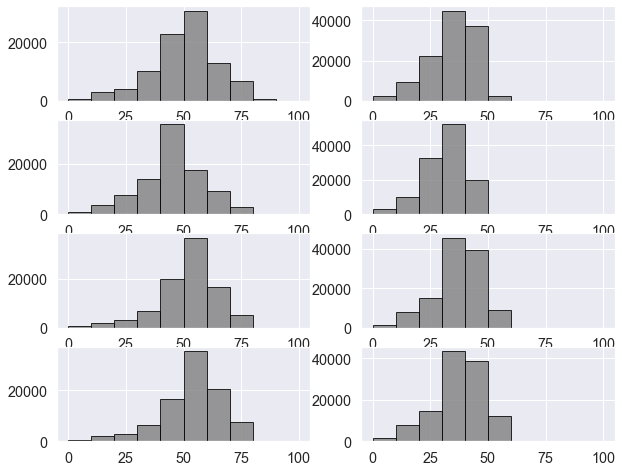

In [103]:
# upstream water age in seasons
fig, axs = plt.subplots(4, 2, figsize=(10, 8))
axs[0, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='spr')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='sum')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='aut')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[3, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='win')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[0, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='spr')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='sum')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='aut')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[3, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='win')]['WA_U'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
plt.show()

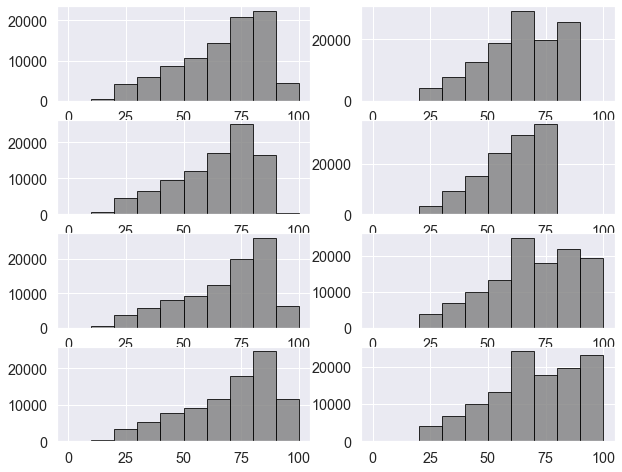

In [104]:
# downstream water age in seasons
fig, axs = plt.subplots(4, 2, figsize=(10, 8))
axs[0, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='spr')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='sum')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='aut')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[3, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='win')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[0, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='spr')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='sum')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='aut')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[3, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='win')]['WA_D'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
plt.show()

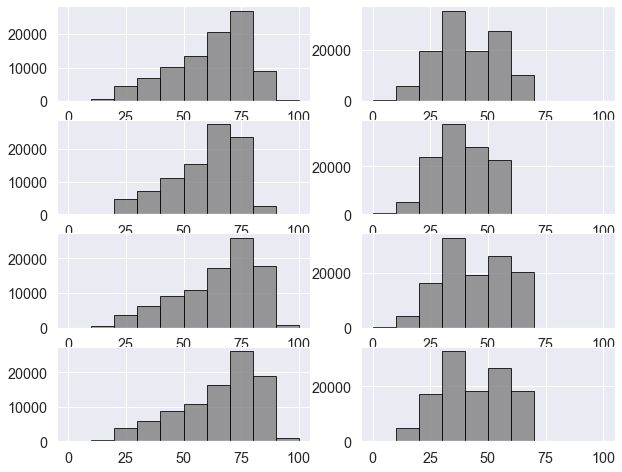

In [105]:
# renewing water age in seasons
fig, axs = plt.subplots(4, 2, figsize=(10, 8))
axs[0, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='spr')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='sum')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='aut')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[3, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='win')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[0, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='spr')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[1, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='sum')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[2, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='aut')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
axs[3, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='win')]['WA_R'], color='gray', edgecolor='black', alpha=0.8, range=[0,100])
plt.show()

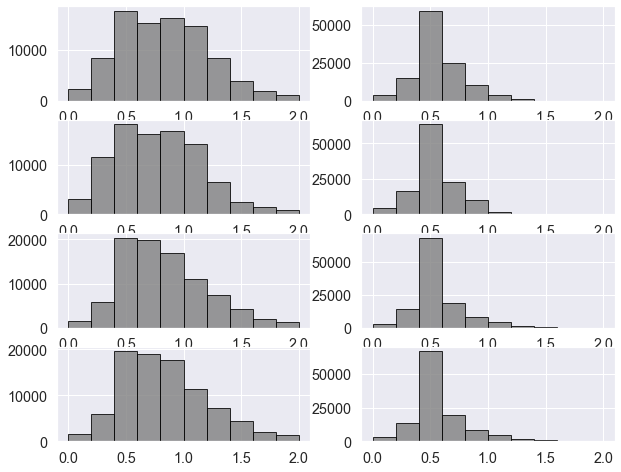

In [106]:
# renewing water age in seasons
fig, axs = plt.subplots(4, 2, figsize=(10, 8))
axs[0, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='spr')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
axs[1, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='sum')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
axs[2, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='aut')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
axs[3, 0].hist(dfs[(dfs['Scenario']=='present') & (dfs['Time']=='win')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
axs[0, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='spr')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
axs[1, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='sum')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
axs[2, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='aut')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
axs[3, 1].hist(dfs[(dfs['Scenario']=='meiji') &   (dfs['Time']=='win')]['RUD'], color='gray', edgecolor='black', alpha=0.8, range=[0,2])
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

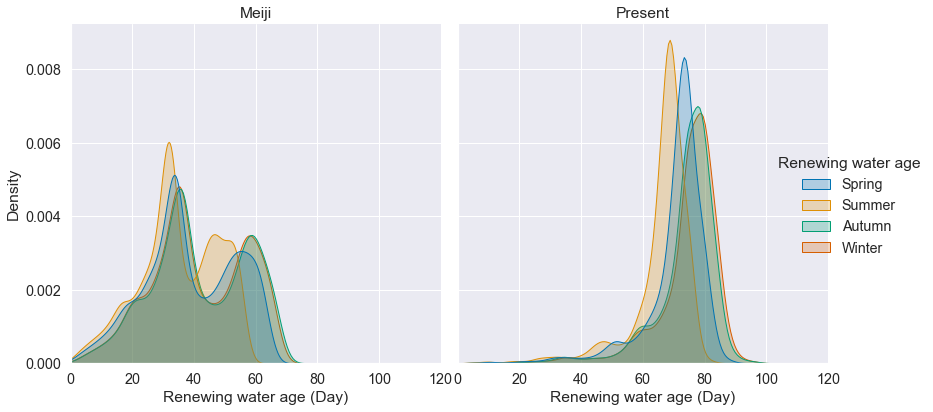

In [122]:
col_wrap=2
legend_title='Renewing water age'
legend_lables=['Spring', 'Summer', 'Autumn','Winter']
savename="hist_type.png"
dft = dfs.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[((dft.Layer == 1))], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_R", kind="kde", hue="Time", fill=True,
                #stat="density",bins = 25,element="step",
                #facet_kws={'legend_out': True},
                palette="colorblind", height=6, aspect=1)
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 120)
g.set_axis_labels("Renewing water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

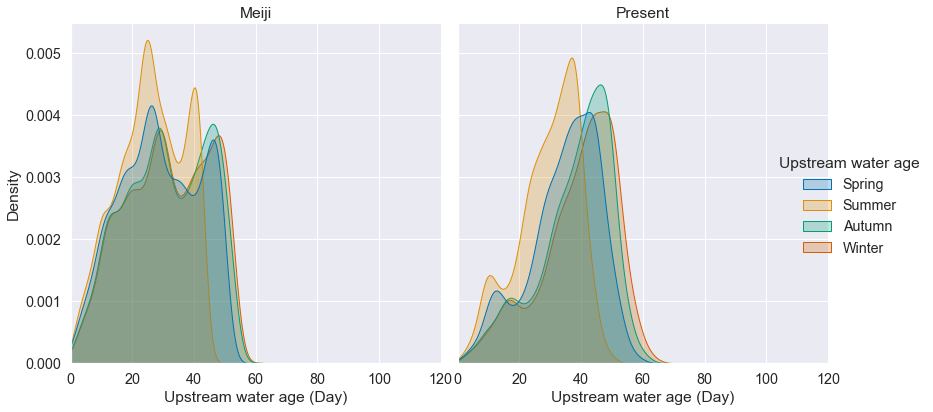

In [124]:
col_wrap=2
legend_title='Upstream water age'
legend_lables=['Spring', 'Summer', 'Autumn','Winter']
savename="hist_type.png"
dft = dfs.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[((dft.Layer == 1))], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_U", kind="kde", hue="Time", fill=True,
                #stat="density",bins = 25,element="step",
                #facet_kws={'legend_out': True},
                palette="colorblind", height=6, aspect=1)
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 120)
g.set_axis_labels("Upstream water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

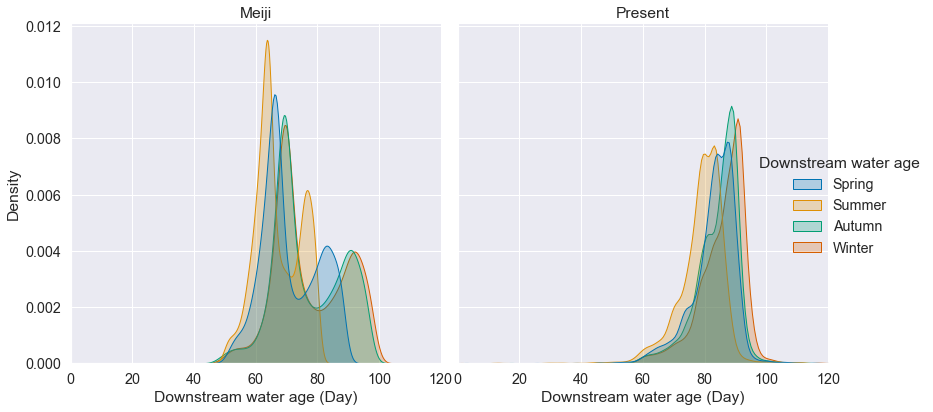

In [125]:
col_wrap=2
legend_title='Downstream water age'
legend_lables=['Spring', 'Summer', 'Autumn','Winter']
savename="hist_type.png"
dft = dfs.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[((dft.Layer == 1))], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_D", kind="kde", hue="Time", fill=True,
                #stat="density",bins = 25,element="step",
                #facet_kws={'legend_out': True},
                palette="colorblind", height=6, aspect=1)
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 120)
g.set_axis_labels("Downstream water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

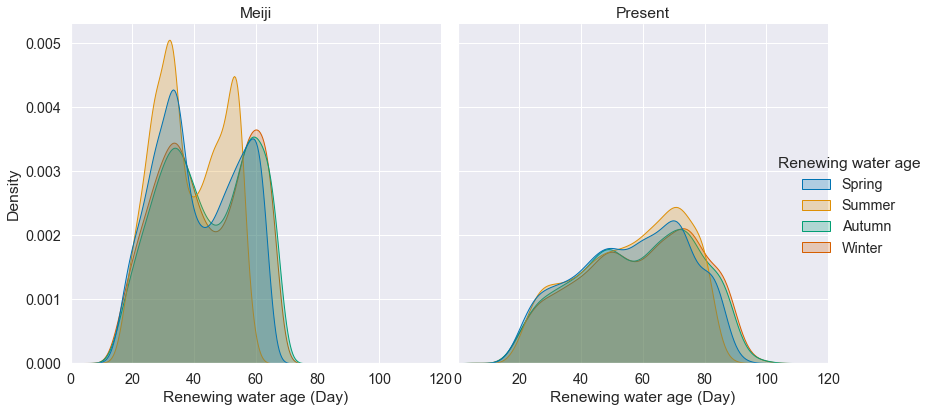

In [126]:
col_wrap=2
legend_title='Renewing water age'
legend_lables=['Spring', 'Summer', 'Autumn','Winter']
savename="hist_type.png"
dft = dfs.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[((dft.Layer == 16))], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_R", kind="kde", hue="Time", fill=True,
                #stat="density",bins = 25,element="step",
                #facet_kws={'legend_out': True},
                palette="colorblind", height=6, aspect=1)
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 120)
g.set_axis_labels("Renewing water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

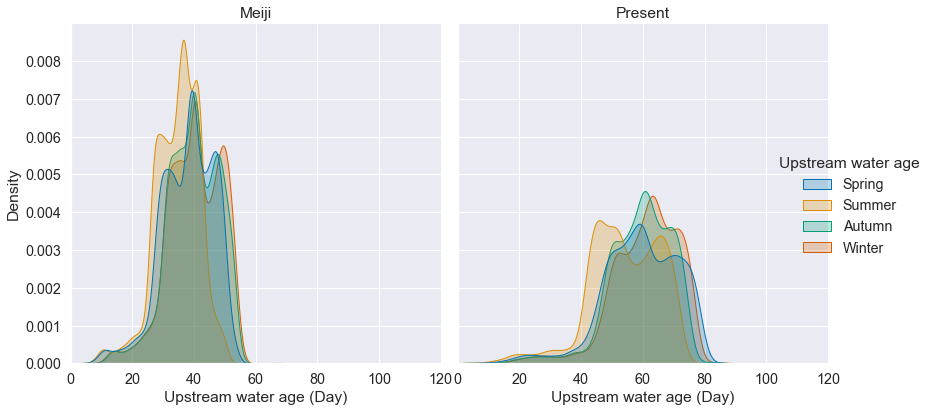

In [127]:
col_wrap=2
legend_title='Upstream water age'
legend_lables=['Spring', 'Summer', 'Autumn','Winter']
savename="hist_type.png"
dft = dfs.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[((dft.Layer == 16))], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_U", kind="kde", hue="Time", fill=True,
                #stat="density",bins = 25,element="step",
                #facet_kws={'legend_out': True},
                palette="colorblind", height=6, aspect=1)
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 120)
g.set_axis_labels("Upstream water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

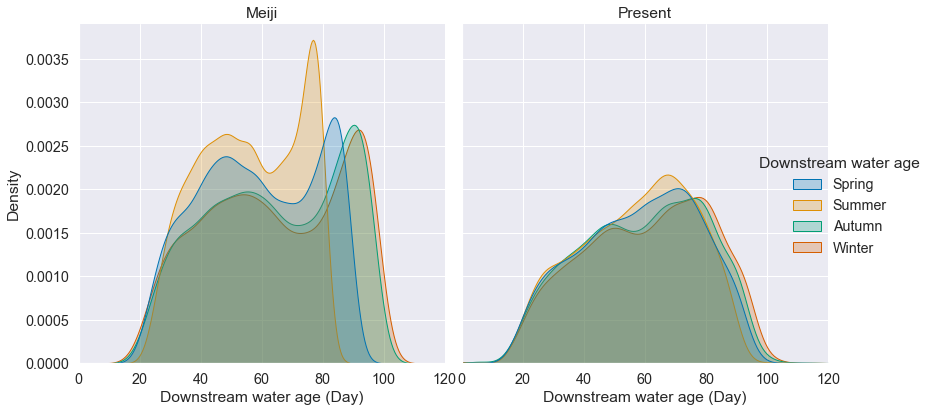

In [128]:
col_wrap=2
legend_title='Downstream water age'
legend_lables=['Spring', 'Summer', 'Autumn','Winter']
savename="hist_type.png"
dft = dfs.copy()
dft['Scenario'] = dft['Scenario'].map({'present': 'Present', 'meiji': 'Meiji'})

plt.clf()
plt.figure(figsize=(4,8))
#sns.set(font="Times New Roman")
g = sns.displot(data=dft[((dft.Layer == 16))], 
                col="Scenario",col_wrap=col_wrap,
                x="WA_D", kind="kde", hue="Time", fill=True,
                #stat="density",bins = 25,element="step",
                #facet_kws={'legend_out': True},
                palette="colorblind", height=6, aspect=1)
sns.color_palette("husl", 9)
sns.set(font_scale=1.3)
plt.xlim(0, 120)
g.set_axis_labels("Downstream water age (Day)", "Density")
g.set_titles("{col_name}")
g._legend.set_title(legend_title)
new_labels = legend_lables
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# plt.savefig(savename,dpi=300)
plt.show()

## 4.3 Jointplot of water age

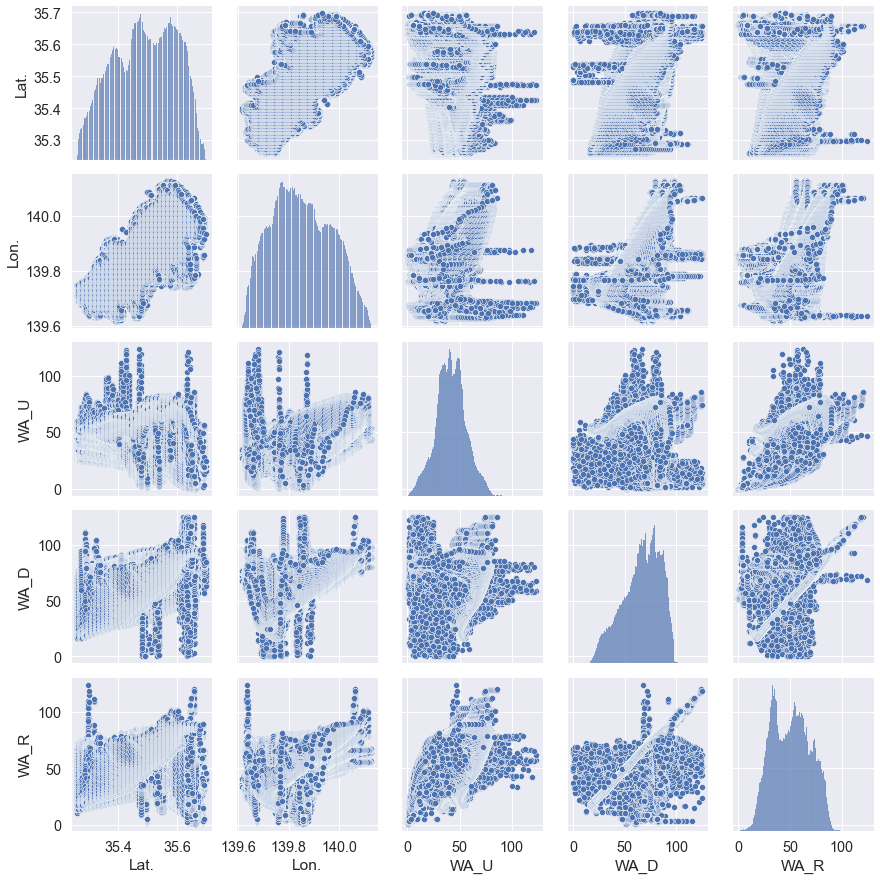

In [129]:
sns.pairplot(dfs[['Lat.','Lon.','Scenario','WA_U','WA_D','WA_R']])

### 4.3.1 Renewing water age

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

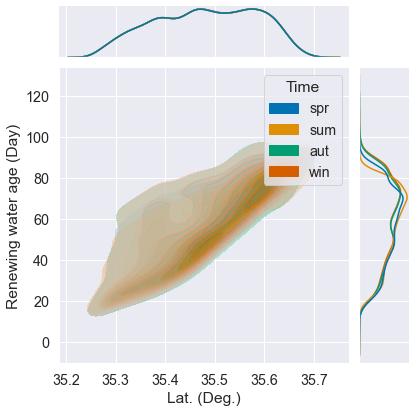

In [137]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=dfs[(dfs.Layer == 16) & (dfs.Scenario == 'present')], 
                  x="Lat.", y="WA_R",
                  kind="kde",
                  hue="Time",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Renewing water age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x432 with 0 Axes>

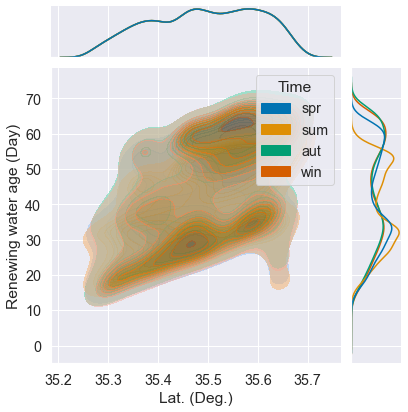

In [138]:
plt.clf()
plt.figure(figsize=(6,6))
#sns.set(font="Times New Roman")
g = sns.jointplot(data=dfs[(dfs.Layer == 16) & (dfs.Scenario == 'meiji')], 
                  x="Lat.", y="WA_R",
                  kind="kde",
                  hue="Time",
                  shade=True,alpha=.5,
                  #levels=20, thresh=.2,
                  palette="colorblind")
#xrange = [35.25,35.68]
#yrange1 = [xrange[0] * slope1 + intercept1, xrange[1] * slope1 + intercept1]
#g.ax_joint.plot(xrange, yrange1, 'b-', linewidth = 2)
#yrange2 = [xrange[0] * slope2 + intercept2, xrange[1] * slope2 + intercept2]
#g.ax_joint.plot(xrange, yrange2, c = 'orange', linewidth = 2)
sns.set(font_scale=1.3)
g.set_axis_labels("Lat. (Deg.)","Renewing water age (Day)")
#plt.savefig("joint_nbs_lat_16",dpi=300)
plt.show()